In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import cv2
import random
import datetime
import tensorflow as tf
from tensorflow.keras.models import Model ,load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix

# Set a seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
! sudo find "/Volumes/Files/TF_course/5. CNN computer vision/Cancer/CNN_Cancer/CNN_Cancer_Detection/data/cancer/cancer/Oral Cancer" -name "._*" -delete

Password:
sudo: a password is required


In [12]:
dataset_path = '/Volumes/Files/TF_course/5. CNN computer vision/Cancer/CNN_Cancer/CNN_Cancer_Detection/data/cancer/cancer/Oral Cancer'

In [13]:
# Define paths to the image categories
# Update this to your dataset path
dyk_path = os.path.join(dataset_path, 'oral_normal')
koc_path = os.path.join(dataset_path, 'oral_scc')
#mep_path= os.path.join(dataset_path, 'lung_aca')
#pab_path = os.path.join(dataset_path, 'lung_bnt')
#sfi_path = os.path.join(dataset_path, 'lung_scc')


In [14]:
# Count images in each folder
dyk_images = len(os.listdir(dyk_path))
koc_images = len(os.listdir(koc_path))
#mep_images = len(os.listdir(mep_path))
#pab_images = len(os.listdir(pab_path))
#sfi_images = len(os.listdir(sfi_path))

In [15]:
# Print the total number of images in each category
print(f"Total dyk images: {dyk_images}")
print(f"Total koc images: {koc_images}")
#print(f"Total mep images: {mep_images}")
#print(f"Total pab images: {pab_images}")
#print(f"Total sfi images: {sfi_images}")


Total dyk images: 5001
Total koc images: 5001


In [16]:
# Function to display multiple sample images from a category
def display_samples(image_paths, title, num_samples=3):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = image_paths[i]
        img = cv2.imread(img_path)  # Read the image
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"{title} {i + 1}")
        plt.axis('off')
    plt.show()

In [18]:
# Get all image paths for each category
dyk_images_list = os.listdir(dyk_path)
koc_images_list = os.listdir(koc_path)
#mep_images_list = os.listdir(mep_path)
#pab_images_list = os.listdir(pab_path)
#sfi_images_list = os.listdir(sfi_path)

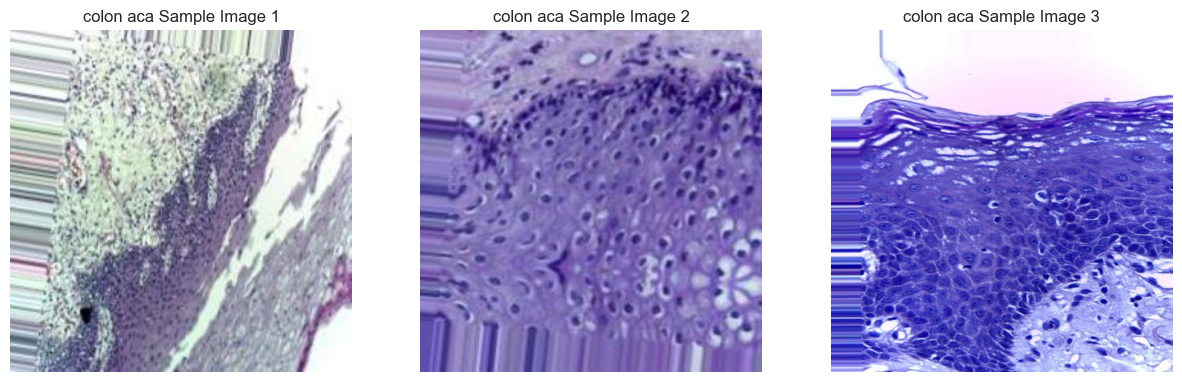

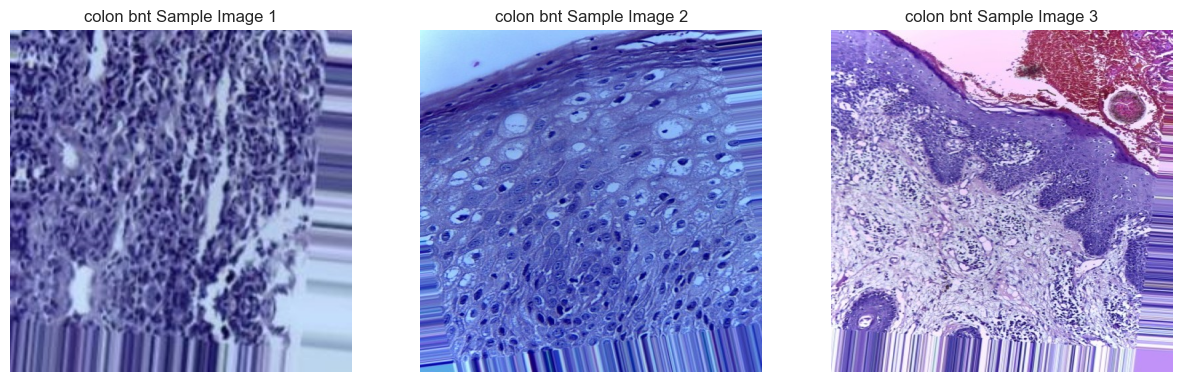

In [19]:
# Display 3 sample images from each category
display_samples([os.path.join(dyk_path, img) for img in dyk_images_list[:3]], 'colon aca Sample Image')

    
display_samples([os.path.join(koc_path, img) for img in koc_images_list[:3]], 'colon bnt Sample Image')


#display_samples([os.path.join(mep_path, img) for img in mep_images_list[:3]], 'lung aca Sample Image')


#display_samples([os.path.join(pab_path, img) for img in pab_images_list[:3]], 'lung bnt Sample Image')


#display_samples([os.path.join(sfi_path, img) for img in sfi_images_list[:3]], 'lung scc Sample Image')

    

In [20]:
def load_image_paths(data_dir):
    """
    Loads image paths and corresponding labels from a directory.

    Args:
        data_dir: Path to the directory containing images.

    Returns:
        A tuple containing:
            - image_paths: A list of image paths.
            - labels: A list of corresponding labels.
    """
    image_paths = []
    labels = []
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                image_paths.append(image_path)
                labels.append(class_dir)  # Use class directory name as label
    return image_paths, labels

In [23]:
image_paths, labels = load_image_paths('/Volumes/Files/TF_course/5. CNN computer vision/Cancer/CNN_Cancer/CNN_Cancer_Detection/data/cancer/cancer/Oral Cancer')
df = pd.DataFrame({'filepath': image_paths, 'labels': labels})
df

filepath       labels
0      /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
1      /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
2      /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
3      /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
4      /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
...                                                  ...          ...
9997   /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal
9998   /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal
9999   /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal
10000  /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal
10001  /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal

[10002 rows x 2 columns]

In [22]:
df = df.sample(frac=1)
df

filepath       labels
8606  /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal
4684  /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
1731  /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
4742  /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
4521  /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
...                                                 ...          ...
5734  /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal
5191  /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal
5390  /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal
860   /Volumes/Files/TF_course/5. CNN computer visio...     oral_scc
7270  /Volumes/Files/TF_course/5. CNN computer visio...  oral_normal

[10002 rows x 2 columns]

In [24]:
print(df.head())
print(df.dtypes)
print(df.shape)
print(df.isnull().sum())
print(df.describe())

                                            filepath    labels
0  /Volumes/Files/TF_course/5. CNN computer visio...  oral_scc
1  /Volumes/Files/TF_course/5. CNN computer visio...  oral_scc
2  /Volumes/Files/TF_course/5. CNN computer visio...  oral_scc
3  /Volumes/Files/TF_course/5. CNN computer visio...  oral_scc
4  /Volumes/Files/TF_course/5. CNN computer visio...  oral_scc
filepath    object
labels      object
dtype: object
(10002, 2)
filepath    0
labels      0
dtype: int64
                                                 filepath    labels
count                                               10002     10002
unique                                              10002         2
top     /Volumes/Files/TF_course/5. CNN computer visio...  oral_scc
freq                                                    1      5001


In [25]:
counts=df['labels'].value_counts()
counts

labels
oral_scc       5001
oral_normal    5001
Name: count, dtype: int64

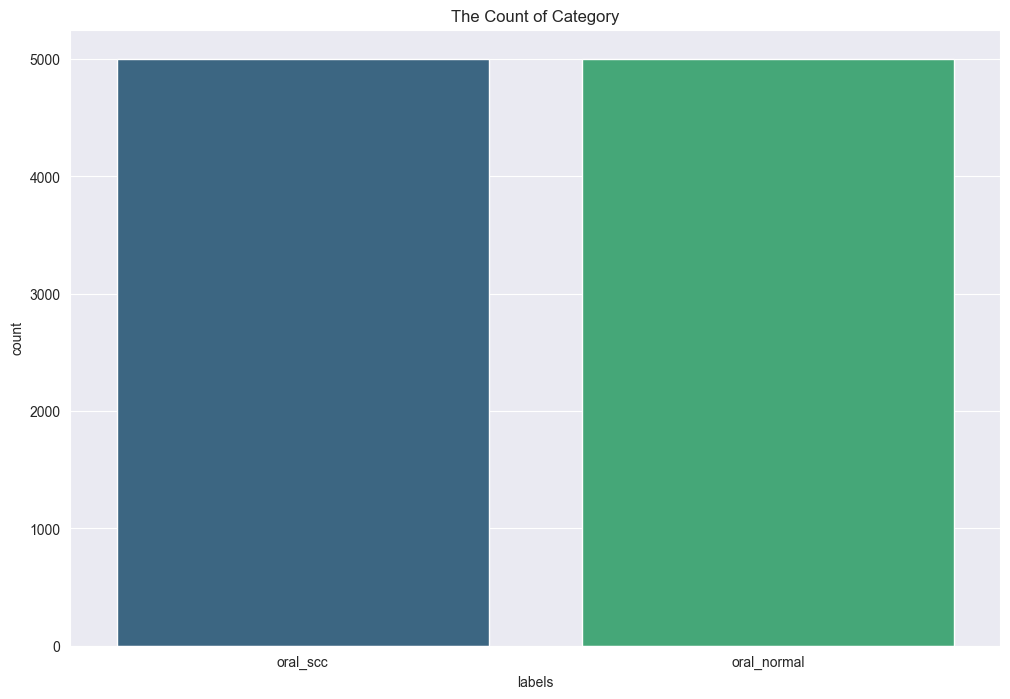

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(x=counts.index,y=counts.values,palette='viridis')
plt.title('The Count of Category')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

In [27]:
strat=df['labels']
train_df ,dummy_df=train_test_split(df,test_size=0.3,random_state=42,stratify=strat)
strate=dummy_df['labels']
valid_df,test_df=train_test_split(dummy_df,test_size=0.5,random_state=42,stratify=strate)

In [28]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(7001, 2)
(1500, 2)
(1501, 2)


In [29]:
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                       color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                       color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe(test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                      color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 7001 validated image filenames belonging to 2 classes.
Found 1500 validated image filenames belonging to 2 classes.
Found 1501 validated image filenames belonging to 2 classes.


In [30]:
x_batch, y_batch = next(train_gen)
print(x_batch.shape)  # Should be (batch_size, 224, 224, 3)
print(y_batch.shape)

(64, 224, 224, 3)
(64, 2)


In [31]:
# Inspect a batch of labels
for x_batch, y_batch in test_gen:
    print(f"y_batch shape: {y_batch.shape}")
    print(f"y_batch sample: {y_batch[0]}")
    break


y_batch shape: (64, 2)
y_batch sample: [1. 0.]


In [41]:
# Clear out any prior log data.
!rm -rf logs

# Sets up a timestamped log directory.
logdir = "logs/train_data/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Creates a file writer for the log directory.
file_writer = tf.summary.create_file_writer(logdir)

In [42]:
def visualize_images(train_gen, file_writer, num_images=25):
    """Visualizes images from an ImageDataGenerator using tf.summary.image."""

    with file_writer.as_default():
        # Get a single batch from the generator.
        images, labels = next(train_gen)

        # Take the first 'num_images' images (or less if the batch is smaller).
        num_to_visualize = min(num_images, images.shape[0])
        images_to_visualize = images[:num_to_visualize]

        # Log the images.
        tf.summary.image(f"{num_to_visualize} training data examples", images_to_visualize, max_outputs=num_to_visualize, step=0)



visualize_images(train_gen, file_writer)

In [32]:
# Build the model using ResNet50
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

model3 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax')
])

# Compile the model with Adamax optimizer
optimizer = Adamax(learning_rate=0.002)  # You can adjust the learning rate
model3.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

In [33]:
# Define the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

save_dir = "/Volumes/Files/TF_course/5. CNN computer vision/Cancer/CNN_Cancer/CNN_Cancer_Detection/Models"

model_checkpoint = ModelCheckpoint(
    os.path.join(save_dir, "Oral_model_final.h5"),  # Save inside the existing directory
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model with both callbacks
history = model3.fit(
    train_gen,
    epochs=20,
    validation_data=valid_gen,
    shuffle=False,
    callbacks=[early_stopping, model_checkpoint],
    validation_steps=None
)

Epoch 1/20
110/110 [==============================] - ETA: 0s - loss: 1.8665 - accuracy: 0.6072
Epoch 1: val_loss improved from inf to 0.62011, saving model to /Volumes/Files/TF_course/5. CNN computer vision/Cancer/CNN_Cancer/CNN_Cancer_Detection/Models/Oral_model_final.h5


/Users/coding/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 941s 8s/step - loss: 1.8665 - accuracy: 0.6072 - val_loss: 0.6201 - val_accuracy: 0.5600
Epoch 2/20
110/110 [==============================] - ETA: 0s - loss: 0.6648 - accuracy: 0.6559
Epoch 2: val_loss improved from 0.62011 to 0.56896, saving model to /Volumes/Files/TF_course/5. CNN computer vision/Cancer/CNN_Cancer/CNN_Cancer_Detection/Models/Oral_model_final.h5
110/110 [==============================] - 935s 8s/step - loss: 0.6648 - accuracy: 0.6559 - val_loss: 0.5690 - val_accuracy: 0.7420
Epoch 3/20
110/110 [==============================] - ETA: 0s - loss: 0.5857 - accuracy: 0.7066
Epoch 3: val_loss improved from 0.56896 to 0.52445, saving model to /Volumes/Files/TF_course/5. CNN computer vision/Cancer/CNN_Cancer/CNN_Cancer_Detection/Models/Oral_model_final.h5
110/110 [==============================] - 947s 8s/step - loss: 0.5857 - accuracy: 0.7066 - val_loss: 0.5245 - val_accuracy: 0.7893
Epoch 4/20
110/110 [============================

In [44]:
load_model = tf.keras.models.load_model('models/Lymphoma_model_final.h5')

In [45]:
history = load_model.fit(
    train_gen,
    epochs=10,
    validation_data=valid_gen,
    shuffle=False,
    callbacks=[early_stopping, model_checkpoint],
    validation_steps=None
)

Epoch 1/10
165/165 [==============================] - ETA: 0s - loss: 0.1751 - accuracy: 0.9364
Epoch 1: val_loss did not improve from 0.14505
165/165 [==============================] - 1439s 9s/step - loss: 0.1751 - accuracy: 0.9364 - val_loss: 0.1876 - val_accuracy: 0.9329
Epoch 2/10
165/165 [==============================] - ETA: 0s - loss: 0.1599 - accuracy: 0.9414
Epoch 2: val_loss did not improve from 0.14505
165/165 [==============================] - 1382s 8s/step - loss: 0.1599 - accuracy: 0.9414 - val_loss: 0.1546 - val_accuracy: 0.9458
Epoch 3/10
165/165 [==============================] - ETA: 0s - loss: 0.1347 - accuracy: 0.9499
Epoch 3: val_loss improved from 0.14505 to 0.12627, saving model to /Volumes/Files/TF_course/5. CNN computer vision/Cancer/CNN_Cancer/CNN_Cancer_Detection/Models/Lymphoma_model_final.h5


/Users/coding/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


165/165 [==============================] - 1404s 9s/step - loss: 0.1347 - accuracy: 0.9499 - val_loss: 0.1263 - val_accuracy: 0.9622
Epoch 4/10
165/165 [==============================] - ETA: 0s - loss: 0.1154 - accuracy: 0.9547
Epoch 4: val_loss did not improve from 0.12627
165/165 [==============================] - 1381s 8s/step - loss: 0.1154 - accuracy: 0.9547 - val_loss: 0.1604 - val_accuracy: 0.9493
Epoch 5/10
165/165 [==============================] - ETA: 0s - loss: 0.1138 - accuracy: 0.9588
Epoch 5: val_loss did not improve from 0.12627
165/165 [==============================] - 1385s 8s/step - loss: 0.1138 - accuracy: 0.9588 - val_loss: 0.1731 - val_accuracy: 0.9382
Epoch 6/10
165/165 [==============================] - ETA: 0s - loss: 0.1221 - accuracy: 0.9559
Epoch 6: val_loss did not improve from 0.12627
165/165 [==============================] - 1388s 8s/step - loss: 0.1221 - accuracy: 0.9559 - val_loss: 0.1296 - val_accuracy: 0.9507
Epoch 7/10
165/165 [===================

In [34]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1

In [35]:
print(tf.__version__)

2.15.0


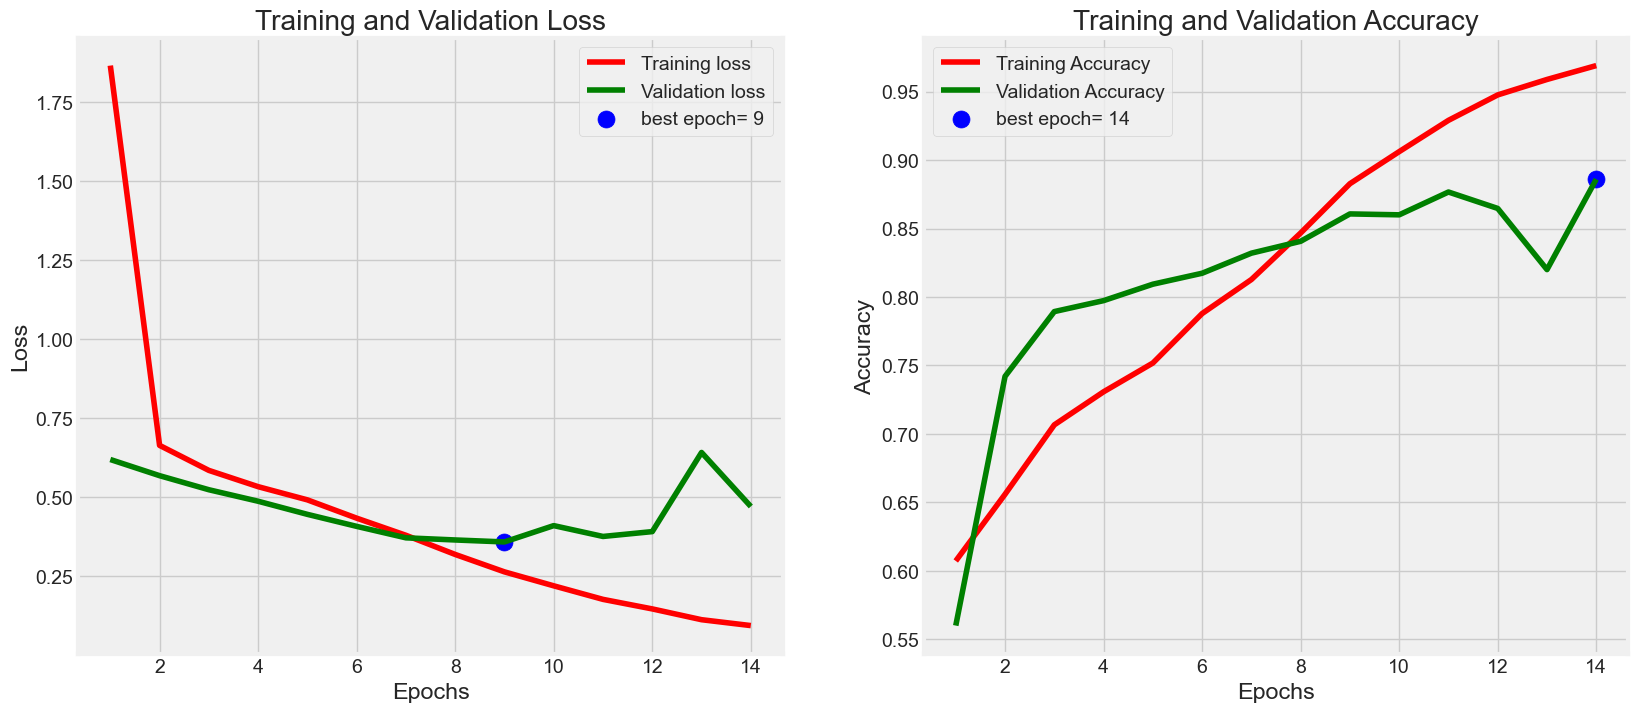

In [36]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


In [37]:
model3.save('Models/Cervix9965.h5')

/Users/coding/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotFoundError: Models; No such file or directory

In [ ]:
# Load the best model from the checkpoint
best_model = load_model('Models/Cervical_model_final.h5')

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(test_gen, verbose=2)

# Print the evaluation results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Total dyk images: 5001
Total koc images: 5001
1/1 [==============================] - 0s 190ms/step


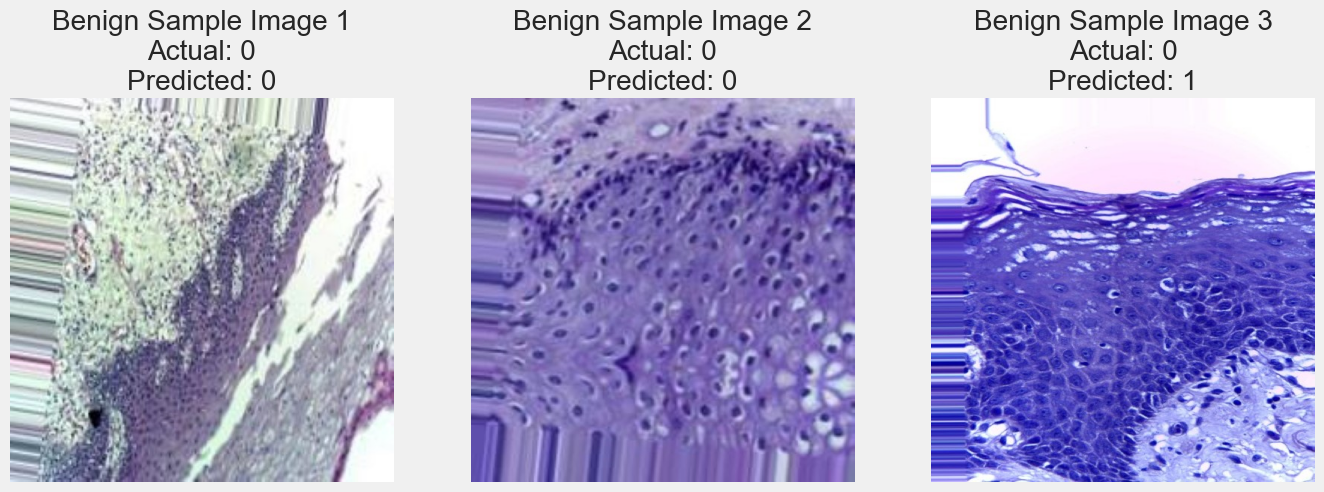

1/1 [==============================] - 0s 149ms/step


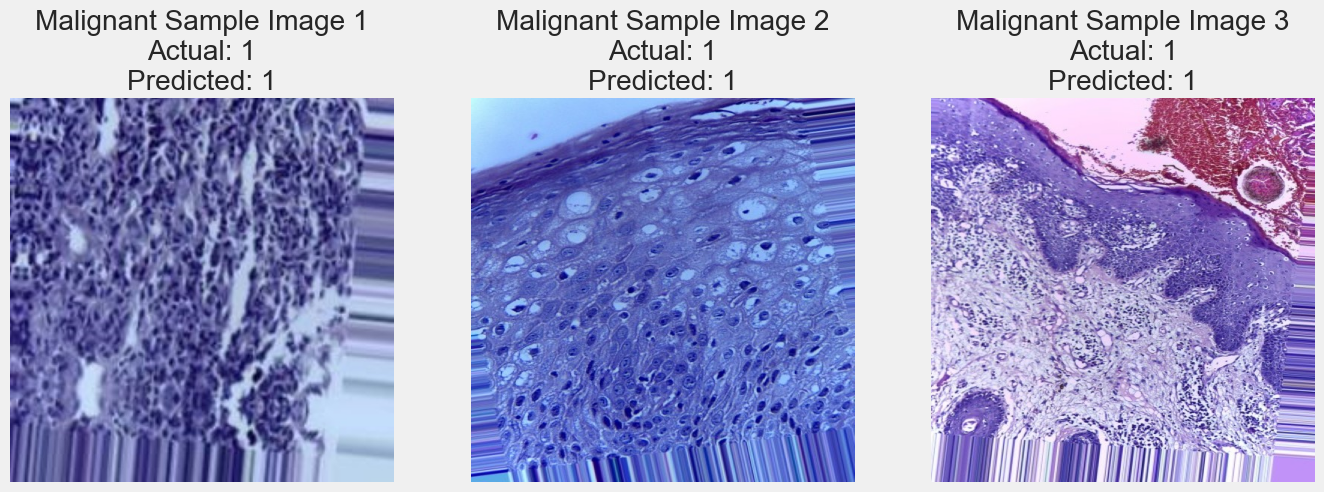

In [39]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths to the image categories
# Update this to your dataset path
dataset_path = '/Volumes/Files/TF_course/5. CNN computer vision/Cancer/CNN_Cancer/CNN_Cancer_Detection/data/cancer/cancer/Oral Cancer'  # Change this to your dataset path
dyk_path = os.path.join(dataset_path, 'oral_normal')
koc_path = os.path.join(dataset_path, 'oral_scc')
#mep_path = os.path.join(dataset_path, 'cervix_mep')
#pab_path = os.path.join(dataset_path, 'cervix_pab')
#sfi_path = os.path.join(dataset_path, 'cervix_sfi')

# Count images in each folder
dyk_images = len(os.listdir(dyk_path))
koc_images = len(os.listdir(koc_path))
#mep_images = len(os.listdir(mep_path))
#pab_images = len(os.listdir(pab_path))
#sfi_images = len(os.listdir(sfi_path))

# Print the total number of images in each category
print(f"Total dyk images: {dyk_images}")
print(f"Total koc images: {koc_images}")
#print(f"Total mep images: {mep_images}")
#print(f"Total pab images: {pab_images}")
#print(f"Total sfi images: {sfi_images}")

# Function to display multiple sample images from a category with predictions
def display_samples(image_paths, title, actual_labels, model, num_samples=3):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = image_paths[i]
        img = cv2.imread(img_path)  # Read the image
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        # Prepare the image for prediction
        img_resized = cv2.resize(img_rgb, (224, 224))  # Resize for model input (adjust size if needed)
        img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension

        # Predict the label
        prediction = model3.predict(img_array)
        predicted_label = np.argmax(prediction, axis=-1)[0]  # Get predicted class index
        actual_label = actual_labels[i]  # Actual label

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"{title} {i + 1}\nActual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis('off')
    plt.show()

# Get all image paths for each category
dyk_images_list = os.listdir(dyk_path)
koc_images_list = os.listdir(koc_path)
#mep_images_list = os.listdir(mep_path)
#pab_images_list = os.listdir(pab_path)
#sfi_images_list = os.listdir(sfi_path)

# Create actual labels for benign and malignant images
benign_labels = [0] * 5001  # Assuming 0 for benign
malignant_labels = [1] * 5001  # Assuming 1 for malignant
malignant_labels = [1] * 5001  # Assuming 1 for malignant

# Display 3 sample images from each category
display_samples([os.path.join(dyk_path, img) for img in dyk_images_list[:3]],
                'Benign Sample Image', benign_labels, model3)

display_samples([os.path.join(koc_path, img) for img in koc_images_list[:3]],
                'Malignant Sample Image', malignant_labels, model3)


In [20]:
test_gen

In [84]:
y_pred_probs = model3.predict(test_gen)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred_classes)

24/24 [==============================] - 203s 8s/step


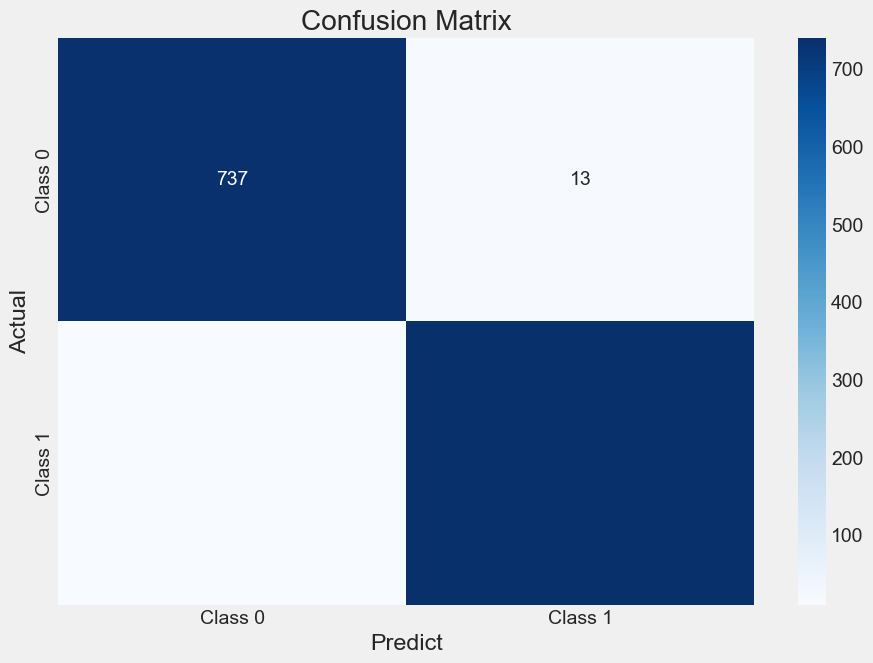

In [85]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predict')
plt.title('Confusion Matrix')
plt.show()

In [21]:
import numpy as np
import pandas as pd

# Initialize lists to store the predictions and true labels
predictions = []
true_labels = []

# Iterate over batches in test_gen
for x_batch, y_batch in test_gen:
    # Make predictions using the model
    preds = model.predict(x_batch)

    # Get the class with the highest probability (argmax)
    predicted_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(y_batch, axis=1)  # Convert one-hot labels to class indices

    # Append the results to the lists
    predictions.append(predicted_classes)
    true_labels.append(true_classes)

    # Break if we've processed all batches
    if len(predictions) * test_gen.batch_size >= len(test_df):
        break

# Flatten the lists into 1D arrays
predictions = np.concatenate(predictions)
true_labels = np.concatenate(true_labels)

# Create a DataFrame with the file paths, true labels, and predictions
df = pd.DataFrame({
    'filepath': test_df['filepath'],  # File paths from the DataFrame
    'true_labels': true_labels,       # True labels (from test_gen)
    'predictions': predictions        # Predicted labels (from the model)
})

# Save to CSV
df.to_csv('predictions.csv', index=False)

NameError: name 'model' is not defined